# Experiment 4: CO2 Emissions 
Defaulting to average carbon intensity 151.6503 gCO2/kWh.

In [22]:
from PIL import Image

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from carbontracker import parser
import pandas as pd

import seaborn as sns

# Define a discrete color palette with a specified number of colors
#sns.set_palette(sns.color_palette("muted", n_colors=10))  # or use another color map and adjust `n_colors`
custom_palette = ["#FFB347", "#779ECB", "#77DD77", "#FF6961", "royalblue", "#CB99C9", "#FDFD96", "#AEC6CF"]
costum_palette_pairs = ['#ffb347', '#ffcc84', '#ffe6c2', 
                        '#779ecb', '#a4bedc', '#d2dfee', 
                        '#77dd77', '#a4e8a4', '#d2f4d2', 
                        '#ff6961', '#ff9b96', '#ffcdca', 
                        '#cb99c9', '#dcbbdb', '#eedded', 
                        '#fdfd96', '#fefeb9', '#fefedc',
                        '#aec6cf', '#c9d9df', '#e4ecef']

sns.set_palette(custom_palette)
colors = sns.color_palette()
colors_pairs = sns.color_palette(costum_palette_pairs) #("tab20c")


# set title font size
plt.rcParams['axes.titlesize'] = 16 #14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

# change fontsize on ticks
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# change fontsize on colorbar
plt.rcParams['font.size'] = 16

# change fontsize on title in legend
plt.rcParams['legend.title_fontsize'] = 16

In [2]:
# Number of initial points: 256
# Number of boundary points: 200
N_init = 256
N_bound = 200

# Viscous Burgers eq: NN

In [3]:
# Create a DataFrame
df_nn = pd.DataFrame(columns=["idx", "N_epochs","N_data", "MSE", "CO2"])

# Data to be added
data_nn = [
    ['nn1a', 3000, 2456, 8.000597e-07, 0.173904980060],
    ['nn2a', 3000, 1456 , 3.265962e-06, 0.103083038673], 
    ['nn3a', 2000, 1456, 6.527086e-06, 0.088065603995],
    ['nn4a', 1500, 1456, 1.882004e-05, 0.061664682101],  
    ['nn5a', 1000, 1456, 2.685855e-05, 0.041813144468],
    ['nn6a', 1000, 1000, 1.493149e-04, 0.029513990383],
    ['nn7a', 1000, 1456, 5.331777e-05, 0.039317073879], 
    ['nn8a', 1500, 3956, 3.046996e-06, 0.136334225076],
    ['nn9a', 4000, 2456, 4.942624e-06, 0.225898050900],   
    ['nn10a', 10000, 5000, 2.408499e-07, 1.374135059279],
    ['nn11a', 5000, 1456, 1.621167e-05, 0.174364090738],
    ['nn12a', 4000, 1456, 3.326079e-06, 0.163183105577],
    ['nn13a', 4500, 1456, 8.672482e-07, 0.184120007088],
    ['nn14a', 5000, 1456, 5.042372e-06, 0.202259547501],
    ['nn15a', 3000, 3456, 1.895618e-06, 0.286659496259], 
    ['nn16a', 5000, 3456, 1.468835e-06, 0.476511028995],   
    ['nn17a', 7000, 4456, 1.529511e-06, 0.716947509201],     
    ['nn18a', 9000, 4456, 1.768318e-07, 1.178755296232],     
]

# Add the data to the DataFrame
df_nn = pd.DataFrame(data_nn, columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])
df_nn = df_nn.sort_values(by=['N_epochs', 'N_data'], ascending=[True, True])

In [4]:
# Create a DataFrame
df_nn = pd.DataFrame(columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])

# Add data to the DataFrame
df_nn = [
    ['nn1a', [1000, 2000], 2000,  8.720810e-07, 0.032877691865], 
    ['nn2a', [1000, 2000], 1000,  2.651151e-07, 0.030667428648], 
    ['nn3a', [1000, 1000], 1000,  4.309925e-06, 0.015587331906], 
    ['nn4a', [500, 1000], 1000,  7.612296e-06, 0.012438346611], 
    ['nn5a', [500, 500], 1000,  4.120393e-05, 0.008420193991], 
    ['nn6a', [500, 500], 544,   5.769063e-05, 0.007248307786],  
    ['nn7a', [300, 700], 1000,  6.020193e-06, 0.009750972326],
    ['nn8a', [1000, 500], 3500, 5.092911e-05, 0.015059990560], 
    ['nn9a', [1000, 3000], 2000, 2.563391e-07, 0.046933309886],
    ['nn10a', [5000, 5000], 4544, 6.115156e-08, 0.146300280600], 
    ['nn11a', [2000, 3000], 1000, 2.820036e-07, 0.045226056420], 
    ['nn12a', [1500, 2500], 1000, 4.991978e-07, 0.035487799265], 
    ['nn13a', [1500, 3000], 1000, 6.630008e-07, 0.044175857920], 
    ['nn14a', [2000, 3000], 3000, 9.203390e-08, 0.065462421160], 
    ['nn15a', [2000, 1000], 3000, 9.457152e-07, 0.030251512426], 
    ['nn16a', [2000, 3000], 1000, 1.829421e-07, 0.047934591325],  
    ['nn17a', [3000, 4000], 4000, 7.510286e-08, 0.102214349407], 
    ['nn18a', [4000, 5000], 4000, 8.677350e-08, 0.121901736710], 
    #['nn19a', [5000, 5000], 5000, 6.419298e-08, 0.158088955464], 
    ['nn20a', [6000, 6000], 6000, 2.907217e-08, 0.211048047243], 
    ['nn21a', [10000, 10000], 7544, 1.976133e-08, 0.390553082623], 
    ['nn22a', [15000, 15000], 7544, 5.230783e-09, 0.594679549514], 
]

df_nn = pd.DataFrame(df_nn, columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])
df_nn["N_epochs_sum"] = df_nn["N_epochs"].apply(sum)
df_nn["N_data"] = df_nn["N_data"] + N_init + N_bound
df_nn = df_nn.sort_values(by=['N_epochs_sum', 'N_data'], ascending=[True, True])

# PINN1: Only physics loss

In [5]:
# Create a DataFrame
df_pinn1 = pd.DataFrame(columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])

# Add data to the DataFrame
data_pinn1 = [
    ['pinn1a', [1000, 2000], 2000,  1.324482e-08, 0.076229587779], 
    ['pinn2a', [1000, 2000], 1000,  2.434077e-08, 0.067202135508], 
    ['pinn3a', [1000, 1000], 1000,  7.231965e-08, 0.033772380744], 
    ['pinn4a', [500, 1000], 1000,  1.416168e-07, 0.028901486363], 
    ['pinn5a', [500, 500], 1000,  9.081982e-07, 0.028416809735], 
    ['pinn6a', [500, 500], 544,  1.001571e-06, 0.019004901363],  
    ['pinn7a', [300, 700], 1000,  4.147939e-07, 0.028523291545],
    ['pinn8a', [1000, 500], 3500, 2.569716e-07, 0.071432793866], 
    ['pinn9a', [1000, 3000], 2000, 1.125075e-08, 0.157683321302],
    ['pinn10a', [5000, 5000], 4544, 7.145194e-10, 0.621415952185], 
    ['pinn11a', [2000, 3000], 1000, 4.849116e-09, 0.280131422102], 
    ['pinn12a', [1500, 2500], 1000, 2.291137e-08, 0.094876300465], 
    ['pinn13a', [1500, 3000], 1000, 1.073606e-08, 0.098588098369], 
    ['pinn14a', [2000, 3000], 3000, 7.555908e-09, 0.205624280837], 
    ['pinn15a', [2000, 1000], 3000, 4.749588e-09, 0.241495396715], 
    ['pinn16a', [2000, 3000], 1000, 1.571562e-08, 0.118866279775],  
    ['pinn17a', [3000, 4000], 4000, 2.074357e-09, 0.299638998834], 
    ['pinn18a', [4000, 5000], 4000, 2.752249e-09, 0.364381935825], 
]

df_pinn1 = pd.DataFrame(data_pinn1, columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])
df_pinn1["N_epochs_sum"] = df_pinn1["N_epochs"].apply(sum)
df_pinn1["N_data"] = df_pinn1["N_data"] + N_init + N_bound
df_pinn1 = df_pinn1.sort_values(by=['N_epochs_sum', 'N_data'], ascending=[True, True])

# PINN 2: Physics loss + data loss

In [6]:
# Create a DataFrame
df_pinn2 = pd.DataFrame(columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])

# Add data to the DataFrame
data_pinn2 = [
    ['pinn1a', [1000, 2000], [1000, 1000],  1.253323e-08, 0.056296797317], 
    ['pinn2a', [1000, 2000], [500, 500],  4.473041e-08, 0.038925386519], 
    ['pinn3a', [1000, 1000], [500, 500],  8.222830e-08, 0.023084920520], 
    ['pinn4a', [500, 1000], [500, 500],  2.661344e-07, 0.019493970253], 
    ['pinn5a', [500, 500], [500, 500],  1.279629e-06, 0.011573383948], 
    ['pinn6a', [500, 500], [272, 272],  2.311070e-06, 0.009677524105],  
    ['pinn7a', [300, 700], [500, 500],  2.144258e-06, 0.012001167464],
    ['pinn8a', [1000, 500], [1750, 1750], 3.184053e-07, 0.035816217451], 
    ['pinn9a', [1000, 3000], [1000, 1000], 9.928196e-09, 0.077742365031],
    ['pinn10a', [5000, 5000], [2272, 2272], 1.108156e-09, 0.314603744269], 
    ['pinn11a', [2000, 3000], [500, 500], 3.112426e-08, 0.062921285481], 
    ['pinn12a', [1500, 2500], [500, 500], 2.272767e-08, 0.052354431618], 
    ['pinn13a', [1500, 3000], [500, 500], 1.657158e-08, 0.056750851792], 
    ['pinn14a', [2000, 3000], [500, 500], 5.353327e-08, 0.062427760581], 
    ['pinn15a', [2000, 1000], [1500, 1500], 4.499686e-08, 0.064267898030],  
    ['pinn16a', [2000, 3000], [1500, 1500], 8.526372e-09, 0.118419312280], 
    ['pinn17a', [3000, 4000], [2000, 2000], 5.048278e-09, 0.205236660173], 
    ['pinn18a', [4000, 5000], [2000, 2000], 1.891776e-09, 0.293387606086], 
]

df_pinn2 = pd.DataFrame(data_pinn2, columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])
df_pinn2["N_data_sum"] = df_pinn2["N_data"].apply(sum)
df_pinn2["N_data_sum"] = df_pinn2["N_data_sum"] + N_init + N_bound
df_pinn2["N_epochs_sum"] = df_pinn2["N_epochs"].apply(sum)
df_pinn2 = df_pinn2.sort_values(by=['N_epochs_sum', 'N_data_sum'], ascending=[True, True])

# PINN 3: Physics loss + enforce IC and BC

In [7]:
# Create a DataFrame
df_pinn3 = pd.DataFrame(columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])

# Add data to the DataFrame
data_pinn3 = [
    ['pinn1a', [1000, 2000], 2000,  3.019011e-09, 0.087654487399], 
    ['pinn2a', [1000, 2000], 1000,  2.735140e-08, 0.061250136858], 
    ['pinn3a', [1000, 1000], 1000,  9.180218e-08, 0.036927256937], 
    ['pinn4a', [500, 1000], 1000,  2.083081e-07, 0.027177681143], 
    ['pinn5a', [500, 500], 1000,  1.853932e-07, 0.019153552091], 
    ['pinn6a', [500, 500], 544,  7.594115e-07, 0.012700643416],  
    ['pinn7a', [300, 700], 1000,  1.543066e-07, 0.022959467207],
    ['pinn8a', [1000, 500], 3500, 1.220292e-07, 0.060231492939], 
    ['pinn9a', [1000, 3000], 2000,  5.847614e-09, 0.122368647400], 
    ['pinn10a', [5000, 5000], 4544, 4.190447e-10, 0.566820206939], 
    ['pinn11a', [2000, 3000], 1000, 9.611647e-09, 0.087583719907], 
    ['pinn12a', [1500, 2500], 1000, 6.529601e-08, 0.074148158722], 
    ['pinn13a', [1500, 3000], 1000, 5.153086e-09, 0.088049462813], 
    ['pinn14a', [2000, 3000], 1000, 8.900161e-09, 0.096177153330], 
    ['pinn15a', [2000, 1000], 3000, 1.579471e-08, 0.109754347440],  
    ['pinn16a', [2000, 3000], 3000, 2.377418e-09, 0.180422582125], 
    ['pinn17a', [3000, 4000], 4000, 5.324979e-10, 0.34946722122], 
    ['pinn18a', [4000, 5000], 4000, 3.844669e-10, 0.441687694217], 
]

df_pinn3 = pd.DataFrame(data_pinn3, columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])
df_pinn3["N_epochs_sum"] = df_pinn3["N_epochs"].apply(sum)
df_pinn3["N_data"] = df_pinn3["N_data"] + N_init + N_bound
df_pinn3 = df_pinn3.sort_values(by=['N_epochs_sum', 'N_data'], ascending=[True, True])

In [8]:
# Create a DataFrame
df_pinn3 = pd.DataFrame(columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])

# Add data to the DataFrame
data_pinn3 = [
    ['pinn1a', [1000, 2000], 2000,  5.163395e-09, 0.097335695408], 
    ['pinn2a', [1000, 2000], 1000,  3.296231e-08, 0.067865987358], 
    ['pinn3a', [1000, 1000], 1000,  1.470634e-07, 0.041822139710], 
    ['pinn4a', [500, 1000], 1000,  2.139570e-08, 0.0367777032273], 
    ['pinn5a', [500, 500], 1000,  1.951818e-07, 0.019471540162], 
    ['pinn6a', [500, 500], 544,  3.701892e-07, 0.018420188253],  
    ['pinn7a', [300, 700], 1000,  1.088257e-07, 0.0229464867517], 
    ['pinn8a', [1000, 500], 3500, 3.249929e-08, 0.071481547972], 
    ['pinn9a', [1000, 3000], 2000,  6.094222e-09, 0.131539903677], 
    ['pinn10a', [5000, 5000], 4544, 2.572934e-10, 0.631547029767], 
    ['pinn11a', [2000, 3000], 1000, 4.934658e-09, 0.112348541907], 
    ['pinn12a', [1500, 2500], 1000, 3.141613e-09, 0.090916374296], 
    ['pinn13a', [1500, 3000], 1000, 2.731456e-08, 0.102576222781], 
    ['pinn14a', [2000, 3000], 1000, 1.186874e-08, 0.108209987943], 
    ['pinn15a', [2000, 1000], 3000, 2.669208e-08, 0.120262179739], 
    ['pinn16a', [2000, 3000], 3000, 1.998376e-09, 0.196399989285], 
    ['pinn17a', [3000, 4000], 4000, 4.846467e-10, 0.389000323193], 
    ['pinn18a', [4000, 5000], 4000, 1.549141e-10, 0.489498469674], 
]

df_pinn3 = pd.DataFrame(data_pinn3, columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])
df_pinn3["N_epochs_sum"] = df_pinn3["N_epochs"].apply(sum)
df_pinn3["N_data"] = df_pinn3["N_data"] + N_init + N_bound
df_pinn3 = df_pinn3.sort_values(by=['N_epochs_sum', 'N_data'], ascending=[True, True])

In [9]:
# print the total number of epochs and data points for the four models

for i in range(18):
    print("Model: ", df_nn ["idx"].iloc[i], "  N_epochs: ", df_nn ["N_epochs"].iloc[i], "N_data: ", df_nn ["N_data"].iloc[i])
    print("Model: ", df_pinn1 ["idx"].iloc[i], "N_epochs: ", df_pinn1 ["N_epochs_sum"].iloc[i], "N_data: ", df_pinn1 ["N_data"].iloc[i])
    print("Model: ", df_pinn2 ["idx"].iloc[i], "N_epochs: ", df_pinn2 ["N_epochs_sum"].iloc[i], "N_data: ", df_pinn2 ["N_data_sum"].iloc[i])
    print("Model: ", df_pinn3 ["idx"].iloc[i], "N_epochs: ", df_pinn3 ["N_epochs_sum"].iloc[i], "N_data: ", df_pinn3 ["N_data"].iloc[i])
    print("\n")

Model:  nn6a   N_epochs:  [500, 500] N_data:  1000
Model:  pinn6a N_epochs:  1000 N_data:  1000
Model:  pinn6a N_epochs:  1000 N_data:  1000
Model:  pinn6a N_epochs:  1000 N_data:  1000


Model:  nn5a   N_epochs:  [500, 500] N_data:  1456
Model:  pinn5a N_epochs:  1000 N_data:  1456
Model:  pinn5a N_epochs:  1000 N_data:  1456
Model:  pinn5a N_epochs:  1000 N_data:  1456


Model:  nn7a   N_epochs:  [300, 700] N_data:  1456
Model:  pinn7a N_epochs:  1000 N_data:  1456
Model:  pinn7a N_epochs:  1000 N_data:  1456
Model:  pinn7a N_epochs:  1000 N_data:  1456


Model:  nn4a   N_epochs:  [500, 1000] N_data:  1456
Model:  pinn4a N_epochs:  1500 N_data:  1456
Model:  pinn4a N_epochs:  1500 N_data:  1456
Model:  pinn4a N_epochs:  1500 N_data:  1456


Model:  nn8a   N_epochs:  [1000, 500] N_data:  3956
Model:  pinn8a N_epochs:  1500 N_data:  3956
Model:  pinn8a N_epochs:  1500 N_data:  3956
Model:  pinn8a N_epochs:  1500 N_data:  3956


Model:  nn3a   N_epochs:  [1000, 1000] N_data:  1456
Model

# Viscous Burgers eq: Results

In [11]:
# import LinearSegmentedColormap
from matplotlib.colors import LinearSegmentedColormap

# Orange Colormap: Lighter peach to darker burnt orange
cmap_orange = LinearSegmentedColormap.from_list(
    "orange_seq", ["#FFFDF6", "#FFB347", "#B85C00"]
)

# Blue Colormap: Lighter sky blue to deeper navy blue
cmap_blue = LinearSegmentedColormap.from_list(
    "blue_seq", ["#F0F8FF", "#779ECB", "#1A3A60"]
)

# Green Colormap: Lighter mint green to deeper forest green
cmap_green = LinearSegmentedColormap.from_list(
    "green_seq", ["#F5FFF5", "#77DD77", "#1F6F1F"]
)

# Red Colormap: Lighter pink to darker crimson
cmap_red = LinearSegmentedColormap.from_list(
    "red_seq", ["#FFF0F0", "#FF6961", "#8B0000"]
)

In [12]:
co2 = np.concatenate([df_nn["CO2"], df_pinn1["CO2"], df_pinn2["CO2"], df_pinn3["CO2"]])
mse = np.concatenate([df_nn["MSE"], df_pinn1["MSE"], df_pinn2["MSE"], df_pinn3["MSE"]])
labels = (['NN'] * len(df_nn) + ['B-PINN'] * len(df_pinn1) + 
          ['D-PINN'] * len(df_pinn2) + ['C-PINN'] * len(df_pinn3))

# Identify Pareto-optimal points
def identify_pareto_front(co2, mse):
    is_pareto = np.ones(len(co2), dtype=bool)
    for i, (c, m) in enumerate(zip(co2, mse)):
        # If any point dominates the current point, mark it as not Pareto-optimal
        is_pareto[i] = not np.any((co2 <= c) & (mse <= m) & ((co2 < c) | (mse < m)))
    return is_pareto

# Find Pareto front
is_pareto = identify_pareto_front(co2, mse)
pareto_co2 = co2[is_pareto]
pareto_mse = mse[is_pareto]

# Sort the Pareto front for plotting
sorted_indices = np.argsort(pareto_co2)
pareto_co2 = pareto_co2[sorted_indices]
pareto_mse = pareto_mse[sorted_indices]

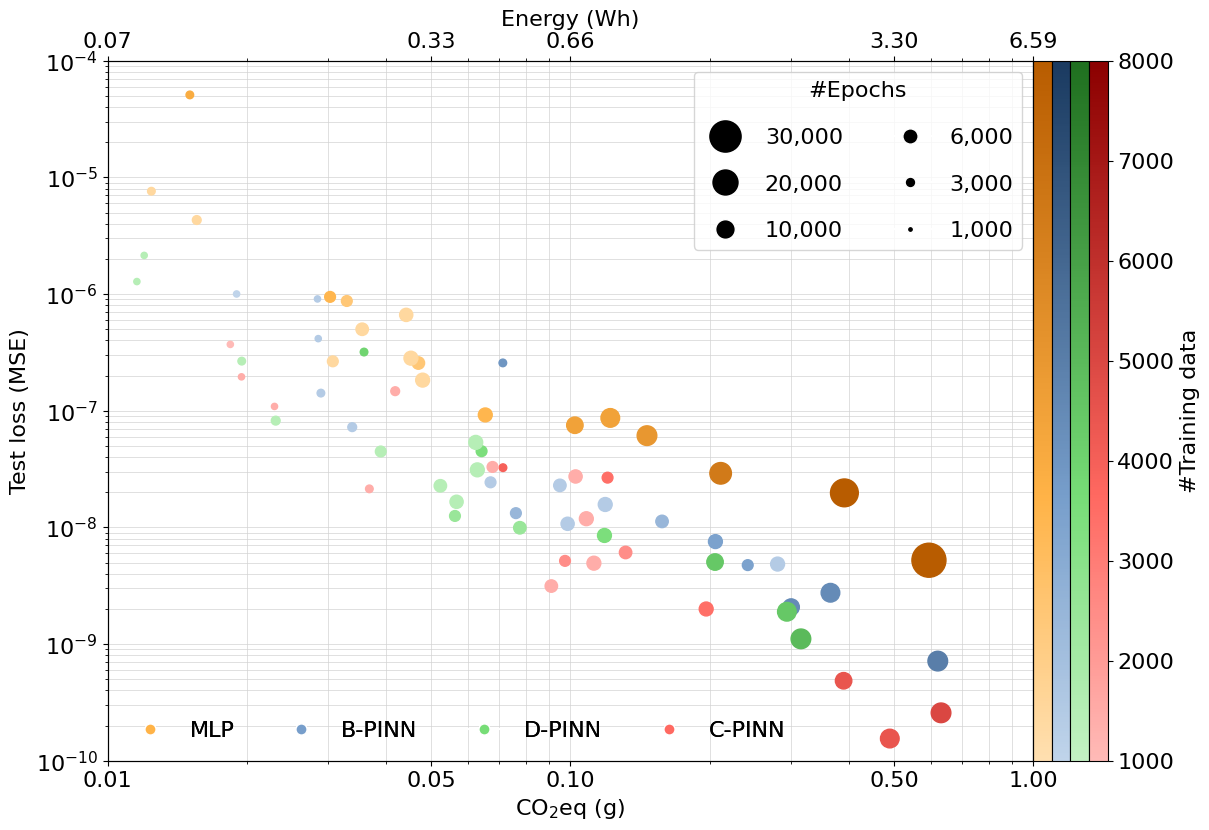

In [25]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import numpy as np

# Example truncate_colormap function
def truncate_colormap(color, minval=0.0, maxval=1.0, n=100):
    cmap = plt.get_cmap(color)
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f"trunc({cmap.name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

# Normalize the color scaling to prevent overly faded points
norm_nn = mcolors.Normalize(vmin=df_nn["N_data"].min(), vmax=df_nn["N_data"].max())
norm_pinn1 = mcolors.Normalize(vmin=df_pinn1["N_data"].min(), vmax=df_pinn1["N_data"].max())
norm_pinn2 = mcolors.Normalize(vmin=df_pinn2["N_data_sum"].min(), vmax=df_pinn2["N_data_sum"].max())
norm_pinn3 = mcolors.Normalize(vmin=df_pinn3["N_data"].min(), vmax=df_pinn3["N_data"].max())

# Scaling factor for dot size
scale_factor = 0.02  # Adjust to make the sizes visually appropriate

# Set up the figure and GridSpec
fig = plt.figure(figsize=(10, 7))
gs = GridSpec(1, 5, width_ratios=[10, 0.2, 0.2, 0.2, 0.2], hspace=10)



# Main plot area
ax = fig.add_subplot(gs[0])
ax.minorticks_on()
ax.grid(True, which='both', color='lightgrey', linestyle='-', linewidth=0.5)


scatter_nn = ax.scatter(
    df_nn["CO2"], df_nn["MSE"], 
    c=df_nn["N_data"], cmap=truncate_colormap(cmap_orange, 0.2, 1.0), norm=norm_nn, 
    s=df_nn["N_epochs_sum"] * scale_factor,
    zorder=3,
)
scatter_pinn1 = ax.scatter(
    df_pinn1["CO2"], df_pinn1["MSE"], 
    c=df_pinn1["N_data"], cmap=truncate_colormap(cmap_blue, 0.2, 1.0), norm=norm_nn, 
    s=df_pinn1["N_epochs_sum"] * scale_factor,
    zorder=3,
)
scatter_pinn2 = ax.scatter(
    df_pinn2["CO2"], df_pinn2["MSE"], 
    c=df_pinn2["N_data_sum"], cmap=truncate_colormap(cmap_green, 0.2, 1.0), norm=norm_nn, 
    s=df_pinn2["N_epochs_sum"] * scale_factor,
    zorder=3,
)

scatter_pinn3 = ax.scatter(
    df_pinn3["CO2"], df_pinn3["MSE"],
    c=df_pinn3["N_data"], cmap=truncate_colormap(cmap_red, 0.2, 1.0), norm=norm_nn,
    s=df_pinn3["N_epochs_sum"] * scale_factor,
    zorder=3,

)

# Custom legend for models
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='MLP', markerfacecolor=colors[0], markersize=8),
    Line2D([0], [0], marker='o', color='w', label='B-PINN', markerfacecolor=colors[1], markersize=8),
    Line2D([0], [0], marker='o', color='w', label='D-PINN', markerfacecolor=colors[2], markersize=8),
    Line2D([0], [0], marker='o', color='w', label='C-PINN', markerfacecolor=colors[3], markersize=8)

]



# Epoch size legend
size_legend_sizes = [30000, 20000, 10000, 6000, 3000, 1000]  
size_legend_labels = [30000, 20000, 10000, 6000, 3000, 1000]  
size_legend = [
    Line2D([0], [0], marker='o', color='w', label=f'{size:,}', 
           markersize=(size * scale_factor)**0.5, markerfacecolor='black') 
    for size in size_legend_sizes
]
#legend = ax.legend(handles=legend_elements + size_legend, loc=(1.2, 0.5), ncols=1, frameon=False)    
#legend = ax.legend(handles=legend_elements + size_legend, loc='upper right', ncols=2, frameon=True)   
#legend.get_frame().set_alpha(1.0)

# legend for epoch size
legend_1 = ax.legend(handles=size_legend, loc='upper right', frameon=True, markerfirst=True, labelspacing=1.2, title="#Epochs", ncols=2)
ax.add_artist(legend_1)

# legend for models
legend_2 = ax.legend(handles=legend_elements, loc='lower left', frameon=False, ncols=4)
ax.add_artist(legend_2)

# Labels and scaling
ax.set_xlabel("CO$_2$eq (g)")
ax.set_ylabel("Test loss (MSE)")
ax.set_xlim(1e-2, 1.0)
ax.set_ylim(1e-10, 1e-4)
ax.set_yscale('log')
ax.set_xscale('log')


x_ticks_position = [1e-2, 5e-2, 1e-1, 5e-1, 1e0]
ax.set_xticks(x_ticks_position)
ax.set_xticklabels(['0.01', '0.05', '0.10', '0.50', '1.00']) 


# Add horizontal colorbars
cbar_ax1 = fig.add_subplot(gs[0, 1])
cb1 = fig.colorbar(scatter_nn, cax=cbar_ax1, orientation="vertical")
cb1.set_ticks([])

cbar_ax2 = fig.add_subplot(gs[0, 2])
cb2 = fig.colorbar(scatter_pinn1, cax=cbar_ax2, orientation="vertical")
cb2.set_ticks([])

cbar_ax3 = fig.add_subplot(gs[0, 3])
cb3 = fig.colorbar(scatter_pinn2, cax=cbar_ax3, orientation="vertical")
cb3.set_ticks([])

cbar_ax4 = fig.add_subplot(gs[0, 4])
cb4 = fig.colorbar(scatter_pinn3, cax=cbar_ax4, orientation="vertical", label = "#Training data")


# Add a second x-axis
ax_top = ax.twiny()  # Create a new x-axis sharing the same y-axis
ax_top.set_xscale('log')
ax_top.set_xlim(ax.get_xlim())  # Align the range with the primary x-axis
ax_top.set_xlabel("Energy (wh)")  # Label for the second x-axis

co2_to_energy = 0.000809788573 / 0.122804680028
energy = np.array(x_ticks_position) * co2_to_energy *1e3 # in wh

# Format energy labels to 1 decimal place
energy_labels = [f"{val:.2f}" for val in energy]

# Set tick positions and labels for the secondary x-axis
ax_top.set_xticks(x_ticks_position)
ax_top.set_xticklabels(energy_labels)
ax_top.set_xlabel("Energy (Wh)")

# plot a horizontal line at y= 9e-8
#ax.axhline(y=2e-8, color='r', linestyle='--', label='1e-8')

plt.subplots_adjust(wspace=0, hspace=0)
plt.subplots_adjust(top=1, bottom=0, left=0, right=1)

plt.show()

[0.01, 0.05, 0.1, 0.5, 1.0]


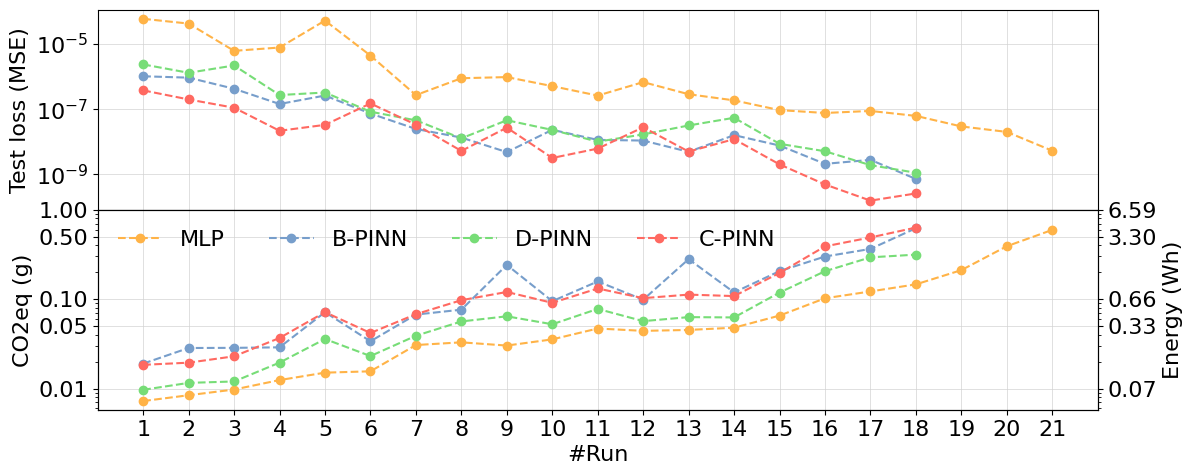

In [28]:
# plot mse as a function of numbers (1-18) for the three pinns

fig, axes = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

x_nn = np.arange(1, len(df_nn) + 1)
x = np.arange(1, 19)
axes[0].plot(x_nn, df_nn["MSE"], label="MLP", color=colors[0], marker='o', ls='--')
axes[0].plot(x, df_pinn1["MSE"], label="B-PINN", color=colors[1], marker='o', ls='--')
axes[0].plot(x, df_pinn2["MSE"], label="D-PINN", color=colors[2], marker='o', ls='--')
axes[0].plot(x, df_pinn3["MSE"], label="C-PINN", color=colors[3], marker='o', ls='--')


axes[1].plot(x_nn, df_nn["CO2"], label="MLP", color=colors[0], marker='o', ls='--')
axes[1].plot(x, df_pinn1["CO2"], label="B-PINN", color=colors[1], marker='o', ls='--')
axes[1].plot(x, df_pinn2["CO2"], label="D-PINN", color=colors[2], marker='o', ls='--')
axes[1].plot(x, df_pinn3["CO2"], label="C-PINN", color=colors[3], marker='o', ls='--')


axes[0].set_ylabel("Test loss (MSE)")
axes[1].set_ylabel("CO2eq (g)")

axes[0].grid(True, color='lightgrey', linestyle='-', linewidth=0.5)
axes[1].grid(True, color='lightgrey', linestyle='-', linewidth=0.5)



axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[1].set_xlabel("#Run")
axes[1].legend(loc='upper left', frameon=False, ncols=4, markerfirst=True)
axes[1].set_xticks(x_nn)
axes[1].set_xticklabels([f"{i}" for i in x_nn])

#x_ticks_position = [1e-2, 5e-2, 1e-1, 5e-1, 1e0]
axes[1].set_yticks(x_ticks_position)
axes[1].set_yticklabels(['0.01', '0.05', '0.10', '0.50', '1.00'])

# make second y-axis for energy
axes2 = axes[1].twinx()
axes2.set_yscale('log')
axes2.set_ylabel("Energy (Wh)")
print(x_ticks_position)
axes2.set_yticks(x_ticks_position)
axes2.set_yticklabels(energy_labels)
axes2.set_ylim(axes[1].get_ylim()) 



# Adjust layout and show plot
plt.subplots_adjust(hspace=0, wspace=0) 
plt.subplots_adjust(top=1, bottom=0, left=0, right=1)
plt.show()




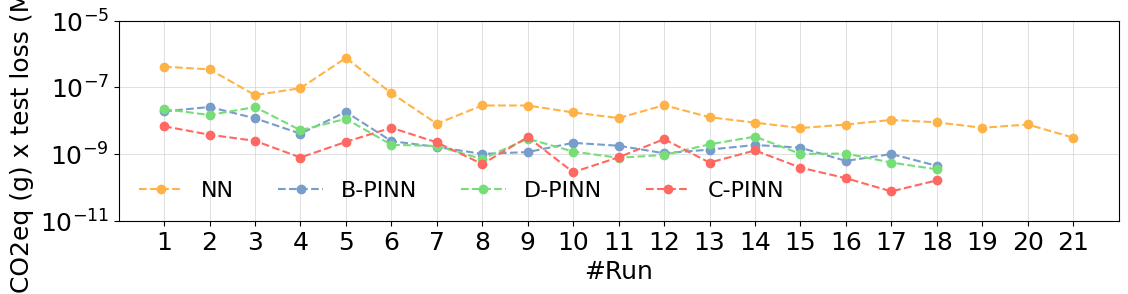

In [19]:
# plot the product of co2 and mse for the all four models

fig, axes = plt.subplots(1, 1, figsize=(10, 2), sharex=True)


axes.plot(x_nn, df_nn["CO2"] * df_nn["MSE"], label="NN", color=colors[0], marker='o', ls='--')
axes.plot(x, df_pinn1["CO2"] * df_pinn1["MSE"], label="B-PINN", color=colors[1], marker='o', ls='--')
axes.plot(x, df_pinn2["CO2"] * df_pinn2["MSE"], label="D-PINN", color=colors[2], marker='o', ls='--')
axes.plot(x, df_pinn3["CO2"] * df_pinn3["MSE"], label="C-PINN", color=colors[3], marker='o', ls='--')

axes.set_ylabel("CO2eq (g) x test loss (MSE)")
axes.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)
axes.set_yscale('log')
axes.set_xlabel("#Run")
axes.legend(loc='lower left', frameon=False, ncols=4, markerfirst=True)
axes.set_xticks(x_nn)
axes.set_xticklabels([f"{i}" for i in x_nn])
axes.set_ylim(1e-11, 1e-5)

# Adjust layout and show plot
plt.subplots_adjust(hspace=0, wspace=0) 
plt.subplots_adjust(top=1, bottom=0, left=0, right=1)
plt.show()



In [20]:
# calculate the log normalized values

# min and max values for CO2 and MSE
co2_min = min(df_pinn1["CO2"].min(), df_pinn2["CO2"].min(), df_pinn3["CO2"].min()) # df_nn["CO2"].min(), 
co2_max = max(df_pinn1["CO2"].max(), df_pinn2["CO2"].max(), df_pinn3["CO2"].max()) # df_nn["CO2"].max(), 
mse_min = min(df_pinn1["MSE"].min(), df_pinn2["MSE"].min(), df_pinn3["MSE"].min()) # df_nn["MSE"].min(), 
mse_max = max(df_pinn1["MSE"].max(), df_pinn2["MSE"].max(), df_pinn3["MSE"].max()) # df_nn["MSE"].max(), 

epsi = 1e-10

# log-normalize the values
df_nn["CO2_norm"] = (np.log(df_nn["CO2"] + epsi) - np.log(co2_min + epsi)) / (np.log(co2_max + epsi) - np.log(co2_min + epsi))
df_nn["MSE_norm"] = (np.log(df_nn["MSE"] + epsi) - np.log(mse_min + epsi)) / (np.log(mse_max + epsi) - np.log(mse_min + epsi))
df_pinn1["CO2_norm"] = (np.log(df_pinn1["CO2"] + epsi) - np.log(co2_min + epsi)) / (np.log(co2_max + epsi) - np.log(co2_min + epsi))
df_pinn1["MSE_norm"] = (np.log(df_pinn1["MSE"] + epsi) - np.log(mse_min + epsi)) / (np.log(mse_max + epsi) - np.log(mse_min + epsi))
df_pinn2["CO2_norm"] = (np.log(df_pinn2["CO2"] + epsi) - np.log(co2_min + epsi)) / (np.log(co2_max + epsi) - np.log(co2_min + epsi))
df_pinn2["MSE_norm"] = (np.log(df_pinn2["MSE"] + epsi) - np.log(mse_min + epsi)) / (np.log(mse_max + epsi) - np.log(mse_min + epsi))
df_pinn3["CO2_norm"] = (np.log(df_pinn3["CO2"] + epsi) - np.log(co2_min + epsi)) / (np.log(co2_max + epsi) - np.log(co2_min + epsi))
df_pinn3["MSE_norm"] = (np.log(df_pinn3["MSE"] + epsi) - np.log(mse_min + epsi)) / (np.log(mse_max + epsi) - np.log(mse_min + epsi))


/Users/sophiawilson/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


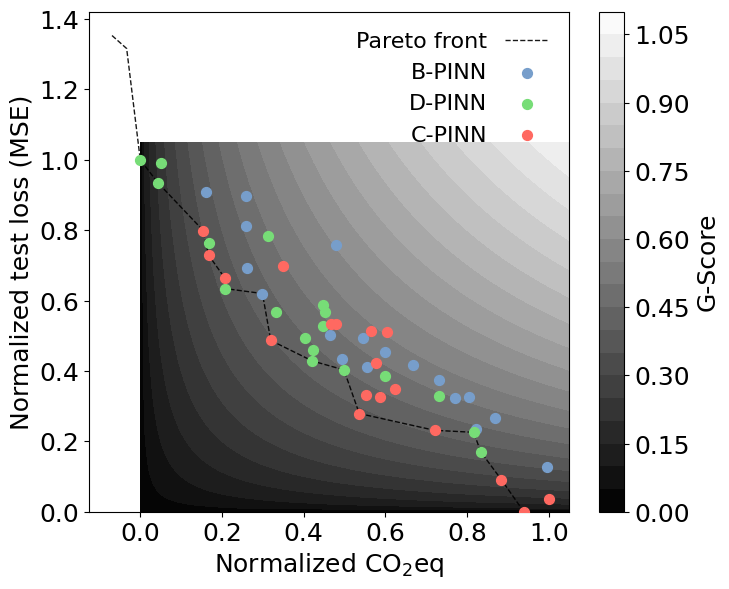

In [21]:
# Calculate the geometric mean of the normalized MSE and CO2 emissions
df_nn["G"] = np.sqrt(df_nn["MSE_norm"] * df_nn["CO2_norm"] + epsi)
df_pinn1["G"] = np.sqrt(df_pinn1["MSE_norm"] * df_pinn1["CO2_norm"] + epsi)
df_pinn2["G"] = np.sqrt(df_pinn2["MSE_norm"] * df_pinn2["CO2_norm"] + epsi)
df_pinn3["G"] = np.sqrt(df_pinn3["MSE_norm"] * df_pinn3["CO2_norm"] + epsi)

# Plot the geometric mean (G-score) for each model
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

co2_ana = np.linspace(-0.0, 1.05, 100)  # Avoid division by zero by starting from 0.01
mse_ana = np.linspace(-0.0, 1.05, 100)
X, Y = np.meshgrid(co2_ana, mse_ana)

# Compute the geometric mean
G_ana = np.sqrt(X * Y + epsi)

# Plot using contourf with color limits
contour = ax.contourf(X, Y, G_ana, levels=20, cmap='binary_r')
cbar = plt.colorbar(contour)
cbar.set_label('G-Score')



# Combine CO2 and MSE data from all models
co2 = np.concatenate([df_nn["CO2_norm"], df_pinn1["CO2_norm"], df_pinn2["CO2_norm"], df_pinn3["CO2_norm"]])
mse = np.concatenate([df_nn["MSE_norm"], df_pinn1["MSE_norm"], df_pinn2["MSE_norm"], df_pinn3["MSE_norm"]])
labels = (['NN'] * len(df_nn) + ['B-PINN'] * len(df_pinn1) + ['D-PINN'] * len(df_pinn2) + ['C-PINN'] * len(df_pinn3))

# Identify Pareto-optimal points
def identify_pareto_front(co2, mse):
    is_pareto = np.ones(len(co2), dtype=bool)
    for i, (c, m) in enumerate(zip(co2, mse)):
        # If any point dominates the current point, mark it as not Pareto-optimal
        is_pareto[i] = not np.any((co2 <= c) & (mse <= m) & ((co2 < c) | (mse < m)))
    return is_pareto

# Find Pareto front
is_pareto = identify_pareto_front(co2, mse)
pareto_co2 = co2[is_pareto]
pareto_mse = mse[is_pareto]

# Sort the Pareto front for plotting
sorted_indices = np.argsort(pareto_co2)
pareto_co2 = pareto_co2[sorted_indices]
pareto_mse = pareto_mse[sorted_indices]

# Plot the Pareto front
ax.plot(pareto_co2, pareto_mse, color='black', marker='', linestyle='--', linewidth=1.0, alpha=0.9, label='Pareto front')


## plot triangles between the points
#for i in range(18):
#    ax.plot([df_pinn1["CO2_norm"].iloc[i], df_pinn2["CO2_norm"].iloc[i]], 
#            [df_pinn1["MSE_norm"].iloc[i], df_pinn2["MSE_norm"].iloc[i]], 
#            color='white', linestyle='-', linewidth=1.0, alpha=0.3)
#    ax.plot([df_pinn1["CO2_norm"].iloc[i], df_pinn3["CO2_norm"].iloc[i]], 
#            [df_pinn1["MSE_norm"].iloc[i], df_pinn3["MSE_norm"].iloc[i]], 
#            color='white', linestyle='-', linewidth=1.0, alpha=0.3)
#    ax.plot([df_pinn2["CO2_norm"].iloc[i], df_pinn3["CO2_norm"].iloc[i]], 
#            [df_pinn2["MSE_norm"].iloc[i], df_pinn3["MSE_norm"].iloc[i]], 
#            color='white', linestyle='-', linewidth=1.0, alpha=0.3)

# Plot the data points
#ax.scatter(df_nn["CO2_norm"], df_nn["MSE_norm"], label="NN", color=colors[0], marker='o', s=50)
ax.scatter(df_pinn1["CO2_norm"], df_pinn1["MSE_norm"], label="B-PINN", color=colors[1], marker='o', s=50, zorder=2)
ax.scatter(df_pinn2["CO2_norm"], df_pinn2["MSE_norm"], label="D-PINN", color=colors[2], marker='o', s=50, zorder=3)
ax.scatter(df_pinn3["CO2_norm"], df_pinn3["MSE_norm"], label="C-PINN", color=colors[3], marker='o', s=50, zorder=4)

# Add labels and title
ax.set_xlabel('Normalized CO$_2$eq')
ax.set_ylabel('Normalized test loss (MSE)')
ax.legend(loc='upper right', frameon=False, ncol=1, markerfirst=False)
# Adjust layout and show plot
plt.subplots_adjust(hspace=0, wspace=0) 
plt.subplots_adjust(top=1, bottom=0, left=0, right=1)
plt.show()


In [ ]:
# print the mean G-scores
print("Mean G-Score for B-PINN: ", df_pinn1["G"].mean(), '$+/-$', df_pinn1["G"].std())
print("Mean G-Score for D-PINN: ", df_pinn2["G"].mean(), '$+/-$', df_pinn2["G"].std())
print("Mean G-Score for C-PINN: ", df_pinn3["G"].mean(), '$+/-$', df_pinn3["G"].std())

Mean G-Score for B-PINN:  0.4768100614483489 $+/-$ 0.05739779626844194
Mean G-Score for D-PINN:  0.395606200569714 $+/-$ 0.1323403147960424
Mean G-Score for C-PINN:  0.39757363346514407 $+/-$ 0.13529394201175435


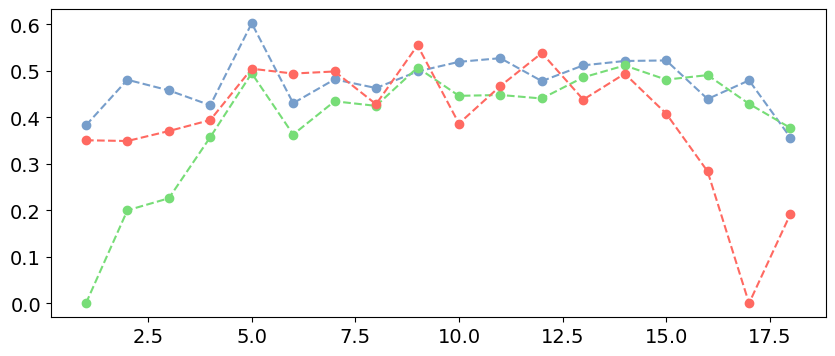

In [ ]:
# plot g-score as a function of numbers (1-18) for the three pinns

fig, axes = plt.subplots(1, 1, figsize=(10, 4), sharex=True)

x = np.arange(1, 19)
axes.plot(x, df_pinn1["G"], label="B-PINN", color=colors[1], marker='o', ls='--')
axes.plot(x, df_pinn2["G"], label="D-PINN", color=colors[2], marker='o', ls='--')
axes.plot(x, df_pinn3["G"], label="C-PINN", color=colors[3], marker='o', ls='--')


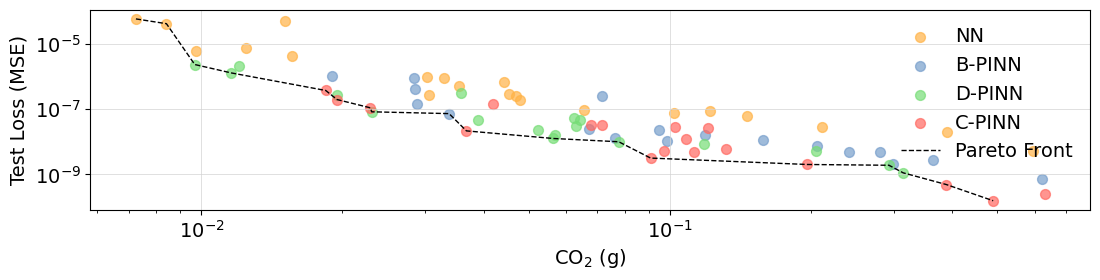

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: Replace with your actual data
co2 = np.concatenate([df_nn["CO2"], df_pinn1["CO2"], df_pinn2["CO2"], df_pinn3["CO2"]])
mse = np.concatenate([df_nn["MSE"], df_pinn1["MSE"], df_pinn2["MSE"], df_pinn3["MSE"]])
labels = (['NN'] * len(df_nn) + ['B-PINN'] * len(df_pinn1) + 
          ['D-PINN'] * len(df_pinn2) + ['C-PINN'] * len(df_pinn3))

# Identify Pareto-optimal points
def identify_pareto_front(co2, mse):
    is_pareto = np.ones(len(co2), dtype=bool)
    for i, (c, m) in enumerate(zip(co2, mse)):
        # If any point dominates the current point, mark it as not Pareto-optimal
        is_pareto[i] = not np.any((co2 <= c) & (mse <= m) & ((co2 < c) | (mse < m)))
    return is_pareto

# Find Pareto front
is_pareto = identify_pareto_front(co2, mse)
pareto_co2 = co2[is_pareto]
pareto_mse = mse[is_pareto]

# Sort the Pareto front for plotting
sorted_indices = np.argsort(pareto_co2)
pareto_co2 = pareto_co2[sorted_indices]
pareto_mse = pareto_mse[sorted_indices]

# Plot the data points
fig, ax = plt.subplots(figsize=(10, 2))

# Scatter plot for all models
for model, color in zip(['NN', 'B-PINN', 'D-PINN', 'C-PINN'], colors):
    idx = [i for i, lbl in enumerate(labels) if lbl == model]
    ax.scatter(co2[idx], mse[idx], label=model, color=color, s=50, alpha=0.7)

# Plot the Pareto front
ax.plot(pareto_co2, pareto_mse, 'k--', label='Pareto Front', linewidth=1)

# Labels and legend
ax.set_xlabel('CO$_2$ (g)')
ax.set_ylabel('Test Loss (MSE)')
ax.legend(frameon=False, loc='upper right')
ax.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

# Log scale if necessary
ax.set_xscale('log')
ax.set_yscale('log')

# Adjust layout and show plot
plt.subplots_adjust(hspace=0, wspace=0) 
plt.subplots_adjust(top=1, bottom=0, left=0, right=1)
plt.show()

In [ ]:
# count how many times each model is on the pareto front
pareto_models = np.array(labels)[is_pareto]
unique_models, counts = np.unique(pareto_models, return_counts=True)
model_counts = dict(zip(unique_models, counts))
model_counts

{'B-PINN': 1, 'C-PINN': 8, 'D-PINN': 7, 'NN': 2}

# Tables

In [ ]:
# make latex table: index (1-18), total number of epochs, adam epochs, lbfgs epochs
df_epochs = pd.DataFrame(columns=["idx", "#Total training data", "#Total Epochs", "#Epochs (adam)", "#Epochs (l-bfgs)"])

# Add data to the DataFrame from existing dataframes
df_epochs["idx"] = range(1, 19)
df_epochs["#Total training data"] = df_nn["N_data"].values 
df_epochs["#Total Epochs"] = df_nn["N_epochs"].values
df_epochs["#Epochs (adam)"] = df_pinn1["N_epochs"].apply(lambda x: x[0]).values
df_epochs["#Epochs (l-bfgs)"] = df_pinn1["N_epochs"].apply(lambda x: x[1]).values

# make latex table: index (1-18), total number of data points, nn data points, pinn1 data points, initial data points + boundary data points
df_data_nn = pd.DataFrame(columns=["idx", "#Sample points",  "#Constraint points"])
df_data_nn["idx"] = range(1, 19)
df_data_nn["#Sample points"] = (df_nn["N_data"].values - np.ones(18) * (N_init + N_bound)).astype(int)
df_data_nn["#Constraint points"] = [int(N_init + N_bound)] * 18

# make latex table for pinn1 data: index (1-18), total number of data points, pinn1 data points, initial data points + boundary data points
df_data_pinn1 = pd.DataFrame(columns=["idx", "#Collocation points",  "#Constraint points"])
df_data_pinn1["idx"] = range(1, 19)
df_data_pinn1["#Collocation points"] = (df_pinn1["N_data"].values - np.ones(18) * (N_init + N_bound)).astype(int)
df_data_pinn1["#Constraint points"] = [int(N_init + N_bound)] * 18

# make latex table for pinn2 data: index (1-18), total number of data points, first element in pinn2 data points, second element in pinn2 data points, initial data points + boundary data points
df_data_pinn2 = pd.DataFrame(columns=["idx", "#Sample points", "#Collocation points",  "#Constraint points"])
df_data_pinn2["idx"] = range(1, 19)
df_data_pinn2["#Sample points"] = df_pinn2["N_data"].apply(lambda x: x[0]).values
df_data_pinn2["#Collocation points"] = df_pinn2["N_data"].apply(lambda x: x[1]).values
df_data_pinn2["#Constraint points"] = [int(N_init + N_bound)] * 18

# make latex table for mse and co2: index (1-18), mse for all models, co2 for all models
df_mse_co2 = pd.DataFrame(columns=["idx", "MSE (NN)", "CO2 (NN)", "MSE (B-PINN)", "CO2 (B-PINN)", "MSE (D-PINN)", "CO2 (D-PINN)", "MSE (C-PINN)", "CO2 (C-PINN)"])
df_mse_co2["idx"] = range(1, 19)
df_mse_co2["MSE (NN)"] = df_nn["MSE"].values
df_mse_co2["CO2 (NN)"] = df_nn["CO2"].values
df_mse_co2["MSE (B-PINN)"] = df_pinn1["MSE"].values
df_mse_co2["CO2 (B-PINN)"] = df_pinn1["CO2"].values
df_mse_co2["MSE (D-PINN)"] = df_pinn2["MSE"].values
df_mse_co2["CO2 (D-PINN)"] = df_pinn2["CO2"].values
df_mse_co2["MSE (C-PINN)"] = df_pinn3["MSE"].values
df_mse_co2["CO2 (C-PINN)"] = df_pinn3["CO2"].values

# make latex table for f-score and mse: index (1-18), f-score for the three pinns
df_fscore = pd.DataFrame(columns=["idx", "F-Score (B-PINN)", "F-Score (D-PINN)", "F-Score (C-PINN)"])
df_fscore["idx"] = range(1, 19)
df_fscore["F-Score (B-PINN)"] = df_pinn1["F"].values
df_fscore["F-Score (D-PINN)"] = df_pinn2["F"].values
df_fscore["F-Score (C-PINN)"] = df_pinn3["F"].values

# make df into latex table
print(df_data_pinn2.to_latex(index=False))


\begin{tabular}{rrrr}
\toprule
 idx &  \#Sample points &  \#Collocation points &  \#Constraint points \\
\midrule
   1 &             272 &                  272 &                 456 \\
   2 &             500 &                  500 &                 456 \\
   3 &             500 &                  500 &                 456 \\
   4 &             500 &                  500 &                 456 \\
   5 &            1750 &                 1750 &                 456 \\
   6 &             500 &                  500 &                 456 \\
   7 &             500 &                  500 &                 456 \\
   8 &            1000 &                 1000 &                 456 \\
   9 &            1500 &                 1500 &                 456 \\
  10 &             500 &                  500 &                 456 \\
  11 &            1000 &                 1000 &                 456 \\
  12 &             500 &                  500 &                 456 \\
  13 &             500 &          

/var/folders/5c/kvpjh5n11_j2mp3l99c22xdr0000gn/T/ipykernel_60443/3408806738.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_data_pinn2.to_latex(index=False))
